# CmpE 547 HW5

Name: Guneykan Ozgul

Student ID: 2012400090

I hereby declare that I observed the honour code of the university when preparing this homework.

Please use a Phyton Notebook Viewer. Git does not render this page properly.


## PART 1

#### Question 1

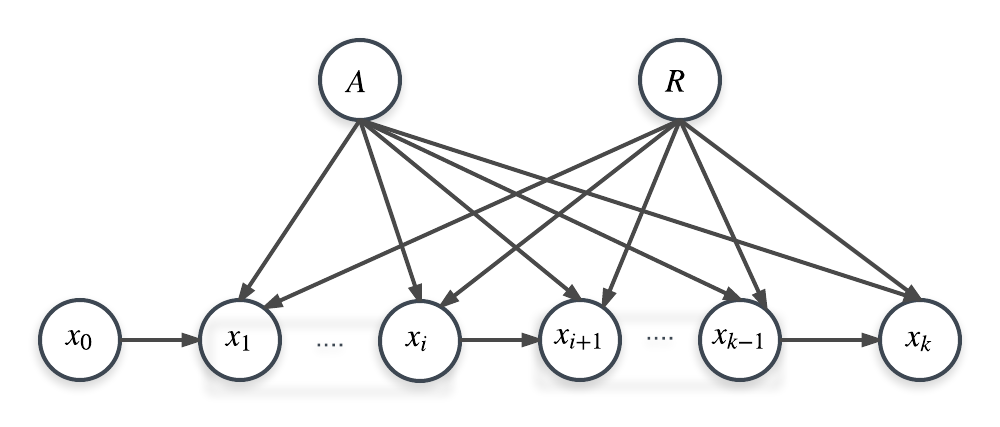

In [2]:
from IPython.display import Image 
Image("network.png",width=500)

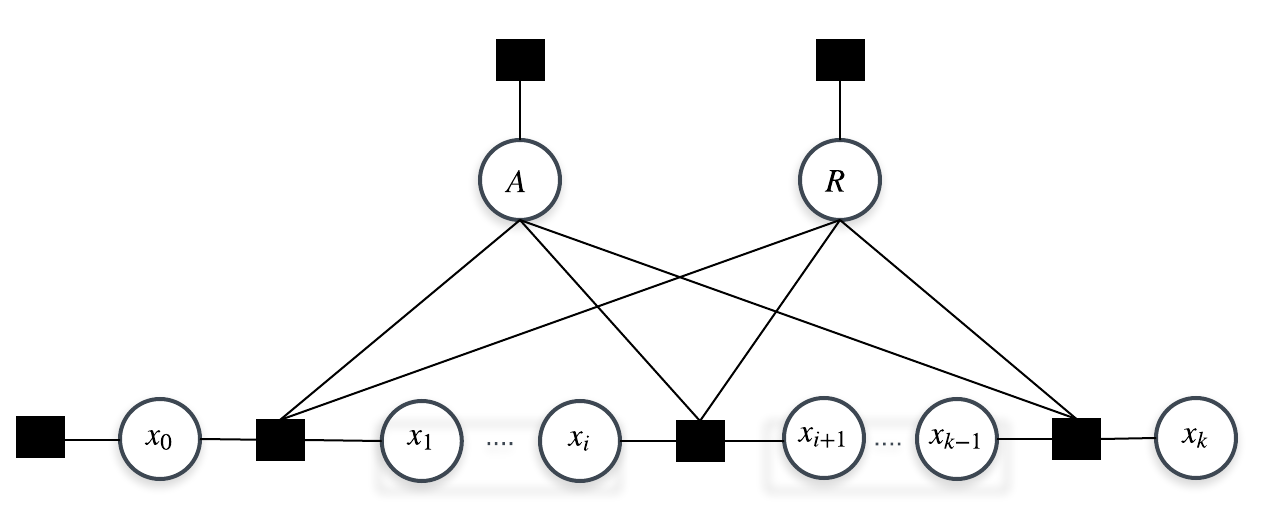

In [206]:
from IPython.display import Image 
Image("factor.png",width=500)

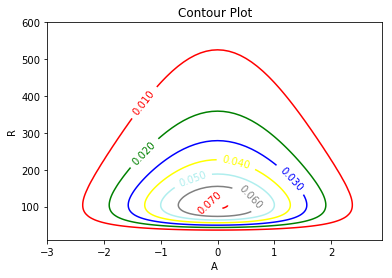

In [99]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import invgamma

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.1
x = np.arange(-3, 3,delta)
y = np.arange(10, 600, delta)
A, R = np.meshgrid(x, y)
Z1 = mlab.normpdf(A, 0, 1.2)
Z2 = mlab.normpdf(-6,A,R)
T=invgamma.pdf(R, a=0.4, scale=250) 
Z = 10**5*Z1*Z2*T


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(A, R, Z,colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5'))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot')
plt.xlabel('A')
plt.ylabel('R')
plt.show()

#### Question 2

$$\begin{eqnarray}
p(A,R,x_0,x_1,...,x_{k-1},x{k})&=& p(A)p(R)p(x_0)\prod \limits_{i=1}^{k} p(x_{i}|x_{i-1},A,R)\\
&=& \mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)p(x_0)\prod \limits_{i=1}^{k} \mathcal{N}(x_k;Ax_{k-1},R) \\
\end{eqnarray}$$

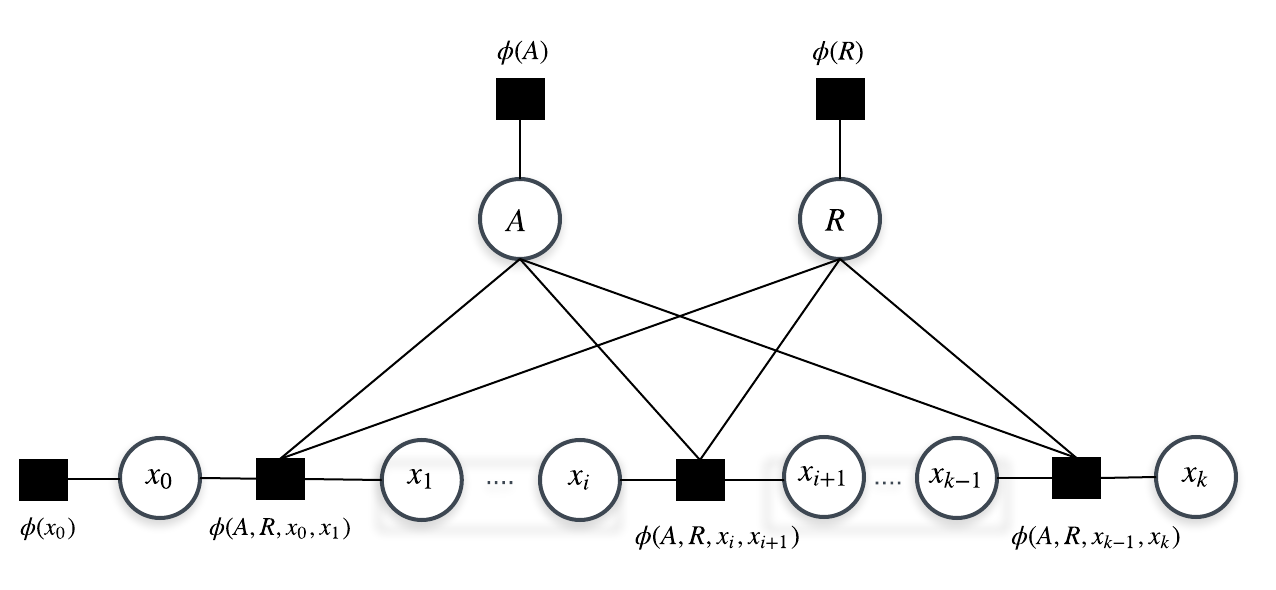

In [207]:
from IPython.display import Image 
Image("factor2.png",width=500)

#### Question 3.a

$\begin{eqnarray}
p(A|R,x_0,x_1) = \dfrac{p(A,R,x_0,x_1)}{p(R,x_0,x_1)}&=&\dfrac{\int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k} p(A,R,x_0,x_1,..., x_k)dx_1dx_2...dx_k}{\int\limits_{A} \int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k} p(A,R,x_0,x_1,..., x_k)dAdx_1dx_2...dx_k}=\dfrac{p(A)\int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k}\prod\limits_{i=1}^{k} p(x_i|x_{i-1},A,R)dx_1dx_2...dx_k}{\int\limits_{A} \int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k}p(A)\prod\limits_{i=1}^{k} p(x_i|x_{i-1},A,R)dAdx_1dx_2...dx_k}\\
 &=& \dfrac{p(A)p(x_1|x_0,A,R)}{\int\limits_{A} p(A) p(x_1|x_0,A,R)dA}=\dfrac{p(A)p(x_1|x_0,A,R)}{Z_1}=\dfrac{\mathcal{N}(A;0,P)\mathcal{N}(x_1;Ax_0,R)}{Z_1}
\end{eqnarray}$

where $Z_1=\int\limits_{A}\mathcal{N}(A;0,P)\mathcal{N}(x_1;Ax_0,R)dA$.


$\begin{eqnarray}
p(A|R,x_0,x_1) \propto \mathcal{N}(A;0,1.2)\mathcal{N}(x_1;Ax_0,R) &=& exp\left[\frac{-1}{2}\left(\frac{A^2}{P}+\frac{(x_1-Ax_0)^2}{R}\right)\right]\\
&\propto& exp\left[\frac{-1}{2}\left(\frac{A^2}{P}+\frac{A^2x_0^2}{R}-2\frac{Ax_0x_1}{R}\right)\right]= exp\left[\frac{-1}{2}\left(A^2\left(\frac{R+Px_0^2}{PR}\right)-2A\frac{x_0x_1}{R}\right)\right]\\
&\propto& exp\left[\frac{\left(\frac{R+Px_0^2}{PR}\right)}{-2}\left(A^2-2A\frac{Px_0x_1}{R+Px_0^2}\right)\right]= exp\left[\frac{-1}{2}\frac{\left(A^2-2A\frac{Px_0x_1}{R+Px_0^2}\right)}{\left(\frac{PR}{R+Px_0^2}\right)}\right]\\
&\propto& exp\left[\frac{-1}{2}\frac{\left(A-\frac{Px_0x_1}{R+Px_0^2}\right)^2}{\left(\frac{PR}{R+Px_0^2}\right)}\right]\\
\end{eqnarray}$


Finally,
$$p(A|R,x_0,x_1) \propto \mathcal{N}\left(A;\frac{Px_0x_1}{R+x_0^2P},\frac{PR}{R+x_0^2P}\right)\\\\\\$$


#### Question 3.b


$p(R|A,x_0,x_1)=\dfrac{p(A,R,x_0,x_1)}{p(A,x_0,x_1)}=\dfrac{\int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k} p(A,R,x_0,x_1,..., x_k)dx_1dx_2...dx_k}{\int\limits_{R} \int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k} p(A,R,x_0,x_1,..., x_k)dRdx_1dx_2...dx_k}=\dfrac{p(R)\int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k}\prod\limits_{i=1}^{k} p(x_i|x_{i-1},A,R)dx_1dx_2...dx_k}{\int\limits_{R} \int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k}p(R)\prod\limits_{i=1}^{k} p(x_i|x_{i-1},A,R)dRdx_1dx_2...dx_k}\\$

$$=\dfrac{p(R)p(x_1|x_0,A,R)}{\int\limits_{R} p(R) p(x_1|x_0,A,R)dR}=\dfrac{p(R)p(x_1|x_0,A,R)}{Z_2}=\dfrac{\mathcal{IG}(R;\alpha,\beta)\mathcal{N}(x_1;Ax_0,R)}{Z_2}$$ 

where $Z_1=\int\limits_{R}\mathcal{IG}(R;0.4,250)\mathcal{N}(x_1;Ax_0,R)dR$.

$\begin{eqnarray}
\log(p(R|A,x_0,x_1))\propto\mathcal{IG}(R;0.4,250)\mathcal{N}(x_1;Ax_0,R) &\propto& \frac{-1}{2}\log(R)-(0.4+1)\log(R)-\frac{-1}{2}\frac{(x_1-Ax_0)^2}{R}-\frac{250}{R}\\
&\propto&-(0.4+\frac{3}{2})\log(R)-(\frac{1}{2}(x_1-Ax_0)^2+250)\frac{1}{R}
\end{eqnarray}
$


Finally,
$$p(R|A,x_0,x_1) \propto \mathcal{IG}\left(R;0.4+\frac{1}{2},\frac{1}{2}(x_1-Ax_0)^2+250\right)\\\\\\$$




#### Question 4)


$$\begin{eqnarray}
p(A,R,x_0=1,x_1=-6)&=&\int\limits_{x_2} \int\limits_{x_3}...\int\limits_{x_k} p(A,R,x_0=1,x_1=-6,..., x_k)dx_1dx_2...dx_k\\
&=&p(x_0=1) p(A)p(R)p(x_1=-6|x_0=1,A,R)\\
&=& p(x_0=1)\mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)\mathcal{N}(-6;A,R)
\end{eqnarray}$$

So,

$$p(A,R,x_0=1,x_1=-6)\propto \mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)\mathcal{N}(x_1=-6;A,R) $$


### PART 2

#### Question 1

E-Step:

Calculate $O(R|R^{(old)})=E\left[p(A,R,x_0,x_1,\theta)\right]_{p(A|R^{(old)},x_0,x_1,\theta)}$

M-Step:

Find $R^*= argmax_R O(R|R^{(old)})$  



Throwing out the terms that do not depend on R we obtain,

$\begin{eqnarray}
O(R|R^{(old)})&\propto&E\left[\frac{-1}{2}\log(2\pi R)-\frac{1}{2}\frac{x_1^2}{R}+\frac{x_1Ax_0}{R}-\frac{1}{2}\frac{A^2}x_0^2{R}-(\alpha+1)\log(R)-\frac{\nu}{\beta R}\right]\\
&\propto& \frac{-1}{2}\log(2\pi R)-\frac{1}{2}\frac{x_1^2}{R}+\frac{x_0x_1}{R}E[A]-\frac{x_0^2}{2R}E[A^2]-(\alpha+1)\log(R)-\frac{\nu}{\beta R}\\ 
\end{eqnarray}$

$\frac{\partial O(R|R^{(old)})}{\partial R}=\frac{-1}{2R}+\frac{x_1^2}{2R^2}-\frac{x_0x_1}{R^2}E[A]+\frac{x_0^2}{2R^2}E[A^2]-\frac{\alpha+1}{R}+\frac{\nu}{\beta R^2}=0\\$

We obtain the following update rule,

$R^*=\dfrac{\frac{x_1^2}{2}-x_0x_1E[A]+\frac{x_0^2}{2}E[A^2]+\frac{\nu}{\beta}}{\alpha+\frac{3}{2}}$ where $E[A]=\dfrac{Px_0x_1}{R+x_0^2P}$ and $E[A^2]=\left(\dfrac{Px_0x_1}{R^{(old)}+x_0^2P}\right)^2+\dfrac{PR^{(old)}}{R^{(old)}+x_0^2P}$.


In [211]:
Rold=1
x0=1
x1=-6
P=1.2
v=0.4
alpha=v
beta=v/100

def Amean(Rt):
    return P*x0*x1/(Rt+x0**2*P)
def A2mean(Rt):
    return Amean(Rt)**2+P*Rt/(Rt+x0**2*P)

for i in range(0,100):
    Rnew=(x1**2/2-x0*x1*Amean(Rold)+A2mean(Rold)*x0**2/2+beta)/(alpha+3/2)
    Rold=Rnew
    
print('Initial R=1')    
print('R* = ',Rnew)


Rold=0
for i in range(0,100):
    Rnew=(x1**2/2-x0*x1*Amean(Rold)+A2mean(Rold)*x0**2/2+beta)/(alpha+3/2)
    Rold=Rnew
    
print('Initial R=0')    
print('R* = ',Rnew)    

Initial R=1
R* =  7.245899080340407
Initial R=0
R* =  0.0029309180959289226


#### Question 2)

E-Step:

Calculate $O(A|A^{(old)})=E\left[p(A,R,x_0,x_1,\theta)\right]_{p(R|A^{(old)},x_0,x_1,\theta)}$

M-Step:

Find $A^*= argmax_A O(A|A^{(old)})$  



Throwing out the terms that do not depend on A we obtain,

$\begin{eqnarray}
O(A|A^{(old)})&\propto&E\left[\frac{x_0x_1A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}+\frac{-1}{2}\frac{A^2}{P}\right]\\
&\propto& x_0x_1AE\left[\frac{1}{R}\right]-\frac{1}{2}x_0^2A^2E\left[\frac{1}{R}\right]-\frac{1}{2}\frac{A^2}{P}\\ 
\end{eqnarray}$

$\frac{\partial O(A|A^{(old)})}{\partial A}=x_0x_1E\left[\frac{1}{R}\right]-Ax_0^2E\left[\frac{1}{R}\right]-\frac{A}{P}=0\\$

We obtain the following update rule,

$A^*=\dfrac{x_0x_1E\left[\frac{1}{R}\right]}{\frac{1}{P}+x_0^2E\left[\frac{1}{R}\right]}$ where $E\left[\frac{1}{R}\right]=\frac{\alpha+\frac{1}{2}}{\dfrac{1}{2}(x_1-A^{(old)}x_0)^2+\frac{\nu}{\beta}}$.


In [218]:
Aold=1
x0=1
x1=-6
P=1.2
v=0.4
alpha=v
beta=v/100

def inverseRmean(At):
    return (alpha+1/2)/(beta+1/2*(x1-At*x0)**2)



for i in range(0,100):
    Anew=x0*x1*inverseRmean(Aold)/(1/P+x0**2*inverseRmean(Aold))
    Aold=Anew
    
print('Initial A=1')    
print('A* = ',Anew)

Aold=-6
for i in range(0,100):
    Anew=x0*x1*inverseRmean(Aold)/(1/P+x0**2*inverseRmean(Aold))
    Aold=Anew
    
    
print('Initial A=-6')    
print('A* = ',Anew)   

Initial A=1
A* =  -0.3845558972418148
Initial A=-6
A* =  -5.976313139142639


#### Question 3

We can choose,

$\begin{eqnarray}
q(A)=\delta (A-m_1)\\
q(R)=\delta (R-m_2)
\end{eqnarray}$

Then,

$\begin{eqnarray}
E\left[\log(\phi)\right]_{q(R)^{(old)}}&\propto& \frac{-1}{2}\frac{A^2}{P}+x_0x_1\frac{A}{m_2}-\frac{1}{2}\frac{x_0^2A^2}{m_2}\\
\frac{\partial E\left[\log(\phi)\right]_{q(R)^{(old)}}}{\partial A}&\propto& \frac{-A}{P}+\frac{x_0x_1}{m_2}-\frac{x_0^2A^2}{m_2}=0\\
\end{eqnarray}$



$m_1=A^*= \dfrac{Px_0x_1}{x_0^2P+m_2}\\$


$\begin{eqnarray}
E\left[\log(\phi)\right]_{q(A)^{(old)}}&\propto& \frac{-1}{2}\frac{x_1^2}{r}+\frac{x_0x_1m_1}{R}-\frac{1}{2}\frac{x_0^2m^2}{R}-\frac{1}{2}\log(2\pi R)-(v+1)\log(R)-\frac{\nu}{\beta R} \\
\frac{\partial E\left[\log(\phi)\right]_{q(A)^{(old)}}}{\partial A}&\propto& \frac{1}{2}\frac{x_1^2}{R^2}-\frac{x_0x_1m_1}{R^2}+\frac{1}{2}\frac{x_0^2m_1^2}{R^2}-\frac{1}{2R}-\frac{v+1}{R}+\frac{\nu}{\beta R^2}\\
\end{eqnarray}$

$m_2=R^*=\dfrac{\frac{x_1^2}{2}-x_0x_1m_1+\frac{x_0^2m_1^2}{2}+\frac{\nu}{\beta}}{\alpha+\frac{3}{2}}\\$




In [164]:
alpha = 0.4
beta = alpha/100
P = 1.2 
x0 = 1 
x1 =-6
T = 300; 
E_A = -6
E_A2 = E_A^2
E_invR = 1/0.00001
data=[]
m1=1
m2=1
for t in range (1,T):
    m1new=P*x0*x1/(x0**2*P+m2)
    m2new=(x1**2/2-x0*x1*m1+x0**2*m1**2/2+beta)/(alpha+3/2)
    m1=m1new
    m2=m2new
   
    
print('A =',m1)
print('R =',m2)

A = -0.892537541668193
R = 6.8668875692812605


#### Question 4


Lower-bound is given by,

$\begin{eqnarray}
\log \mathcal{B} &\geq& E\left[\log(\phi(A,R,x_0,x_1))-\log(q(A)q(R))   \right]_{q(A)q(R)}\\
&\propto& E\left[ \frac{-1}{2}\frac{A^2}{P}+ \frac{-1}{2}\frac{x_1^2}{R}+\frac{x_0x_1A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-(\alpha-a)\log(R)-\frac{\frac{\nu}{\beta}-b}{R}-\frac{1}{2}\log(2\pi R)+\frac{1}{2}\frac{(A-\mu)^2}{\Sigma}+\log \Gamma(a)-a\log(b) -\frac{1}{2}\log(2\pi\Sigma)\right]_{q(A)q(R)}
\end{eqnarray}$

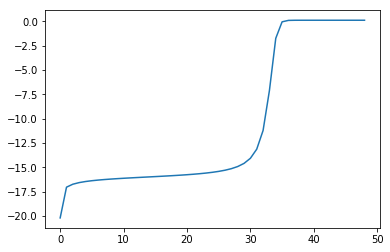

In [205]:
from scipy.special import gammaln as gammaln
from scipy.special import gamma as gamma
alpha = 0.4
beta = alpha/100
P = 1.2 
x0 = 1 
x1 =-6
T = 50; 
E_A = -6
E_A2 = E_A**2
E_invR = 1/0.00001
data=[]
for t in range (1,T):
    Sig = 1/(1/P + x_0*x_0*E_invR)
    mu = x0*x1*E_invR/(1/P + x0**2*E_invR)
    E_A = mu
    E_A2 = mu**2 + 1/(1/P + x0**2*E_invR)
    a = alpha+0.5
    b = 0.5*(x1**2 - 2*x1*x0*E_A + x0**2*E_A2) + beta;
    E_invR = a/b
    bound=-0.5*E_A2/P-0.5*x1**2*E_invR+x0*x1*E_A*E_invR-0.5*x0**2*E_A2*E_invR-alpha*np.log(1/E_invR)-beta*E_invR-0.5*np.log(2*np.pi*1/E_invR)
    bound+=-E_A*mu/Sig+0.5*E_A2/Sig+0.5*mu**2/Sig+0.5*np.log(2*np.pi*Sig)
    bound+=a*np.log(1/E_invR)+b*E_invR+gammaln(a)
    data.append(bound)

plt.plot(data)    
  
plt.show()    